In [185]:
# Data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import IsolationForest

In [186]:
import warnings
warnings.filterwarnings('ignore')

In [187]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries

In [188]:
def set_outliers_to_boundary(df):

    X = df.drop('Age', axis=1)

    isof = IsolationForest(random_state=42, contamination=0.05)
    isof.fit(X)

    outlier_preds = isof.predict(X)

    for i, pred in enumerate(outlier_preds):
        if pred == -1:
            upper_boundary = calculate_outliers(X.iloc[i])
            X.iloc[i] = X.iloc[i].clip(upper=upper_boundary[1])
    
    cleaned_df = pd.concat([X, df['Age']], axis=1)

    return cleaned_df

In [189]:
virus_df = pd.read_csv('drive/MyDrive/ColabNotebooks/UMA/virus_df_full_only_age.csv').drop(['Country',
                                                                                            'Age_Child', 
                                                                                            'Age_Adult',
                                                                                            'Age_Infant',
                                                                                            'Age_Elderly',
                                                                                            'Age_Mix',
                                                                                            'Health_Status', 
                                                                                            'Archaeal', 
                                                                                            'Bacteriophage', 
                                                                                            'Eukaryotic', 
                                                                                            'crassphage'], axis=1)
virus_df['Age'] = virus_df['Age'].map({'Child': 0, 'Infant': 1, 'Adult': 2, 'Elderly': 3, 'Mix': 4})
virus_df.head()

,Age,Healthy,Ackermannviridae,Adenoviridae,Alphaflexiviridae,Anelloviridae,Asfarviridae,Astroviridae,Bicaudaviridae,Caliciviridae,...,Papillomaviridae,Parvoviridae,Picornaviridae,Podoviridae,Polyomaviridae,Poxviridae,Rudiviridae,Siphoviridae,Smacoviridae,Virgaviridae
0,0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
1,0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
2,0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.14,0.0,0.0,0.0,0.00,0.0,0.0
3,0,1.0,0.0,0.0,0.0,3.84,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.84,0.0,0.0,0.0,3.84,0.0,0.0
4,0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0


In [190]:
target = 'Healthy'

X = virus_df.loc[:,virus_df.columns!=target]
y = virus_df.loc[:,virus_df.columns==target]

oversample = SMOTENC(categorical_features=[0], random_state=42)
X, y = oversample.fit_resample(X, y)
X = set_outliers_to_boundary(X)

In [191]:
virus_df = pd.concat([X, y], axis=1)

In [192]:
virus_df.head()

,Ackermannviridae,Adenoviridae,Alphaflexiviridae,Anelloviridae,Asfarviridae,Astroviridae,Bicaudaviridae,Caliciviridae,Circoviridae,Cruliviridae,...,Picornaviridae,Podoviridae,Polyomaviridae,Poxviridae,Rudiviridae,Siphoviridae,Smacoviridae,Virgaviridae,Age,Healthy
0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0,1.0
1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0,1.0
2,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.14,0.0,0.0,0.0,0.00,0.0,0.0,0,1.0
3,0.0,0.0,0.0,3.84,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.84,0.0,0.0,0.0,3.84,0.0,0.0,0,1.0
4,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0,1.0


In [193]:
virus_presence_df = virus_df.copy()
virus_presence_df[virus_presence_df > 0] = 1.0

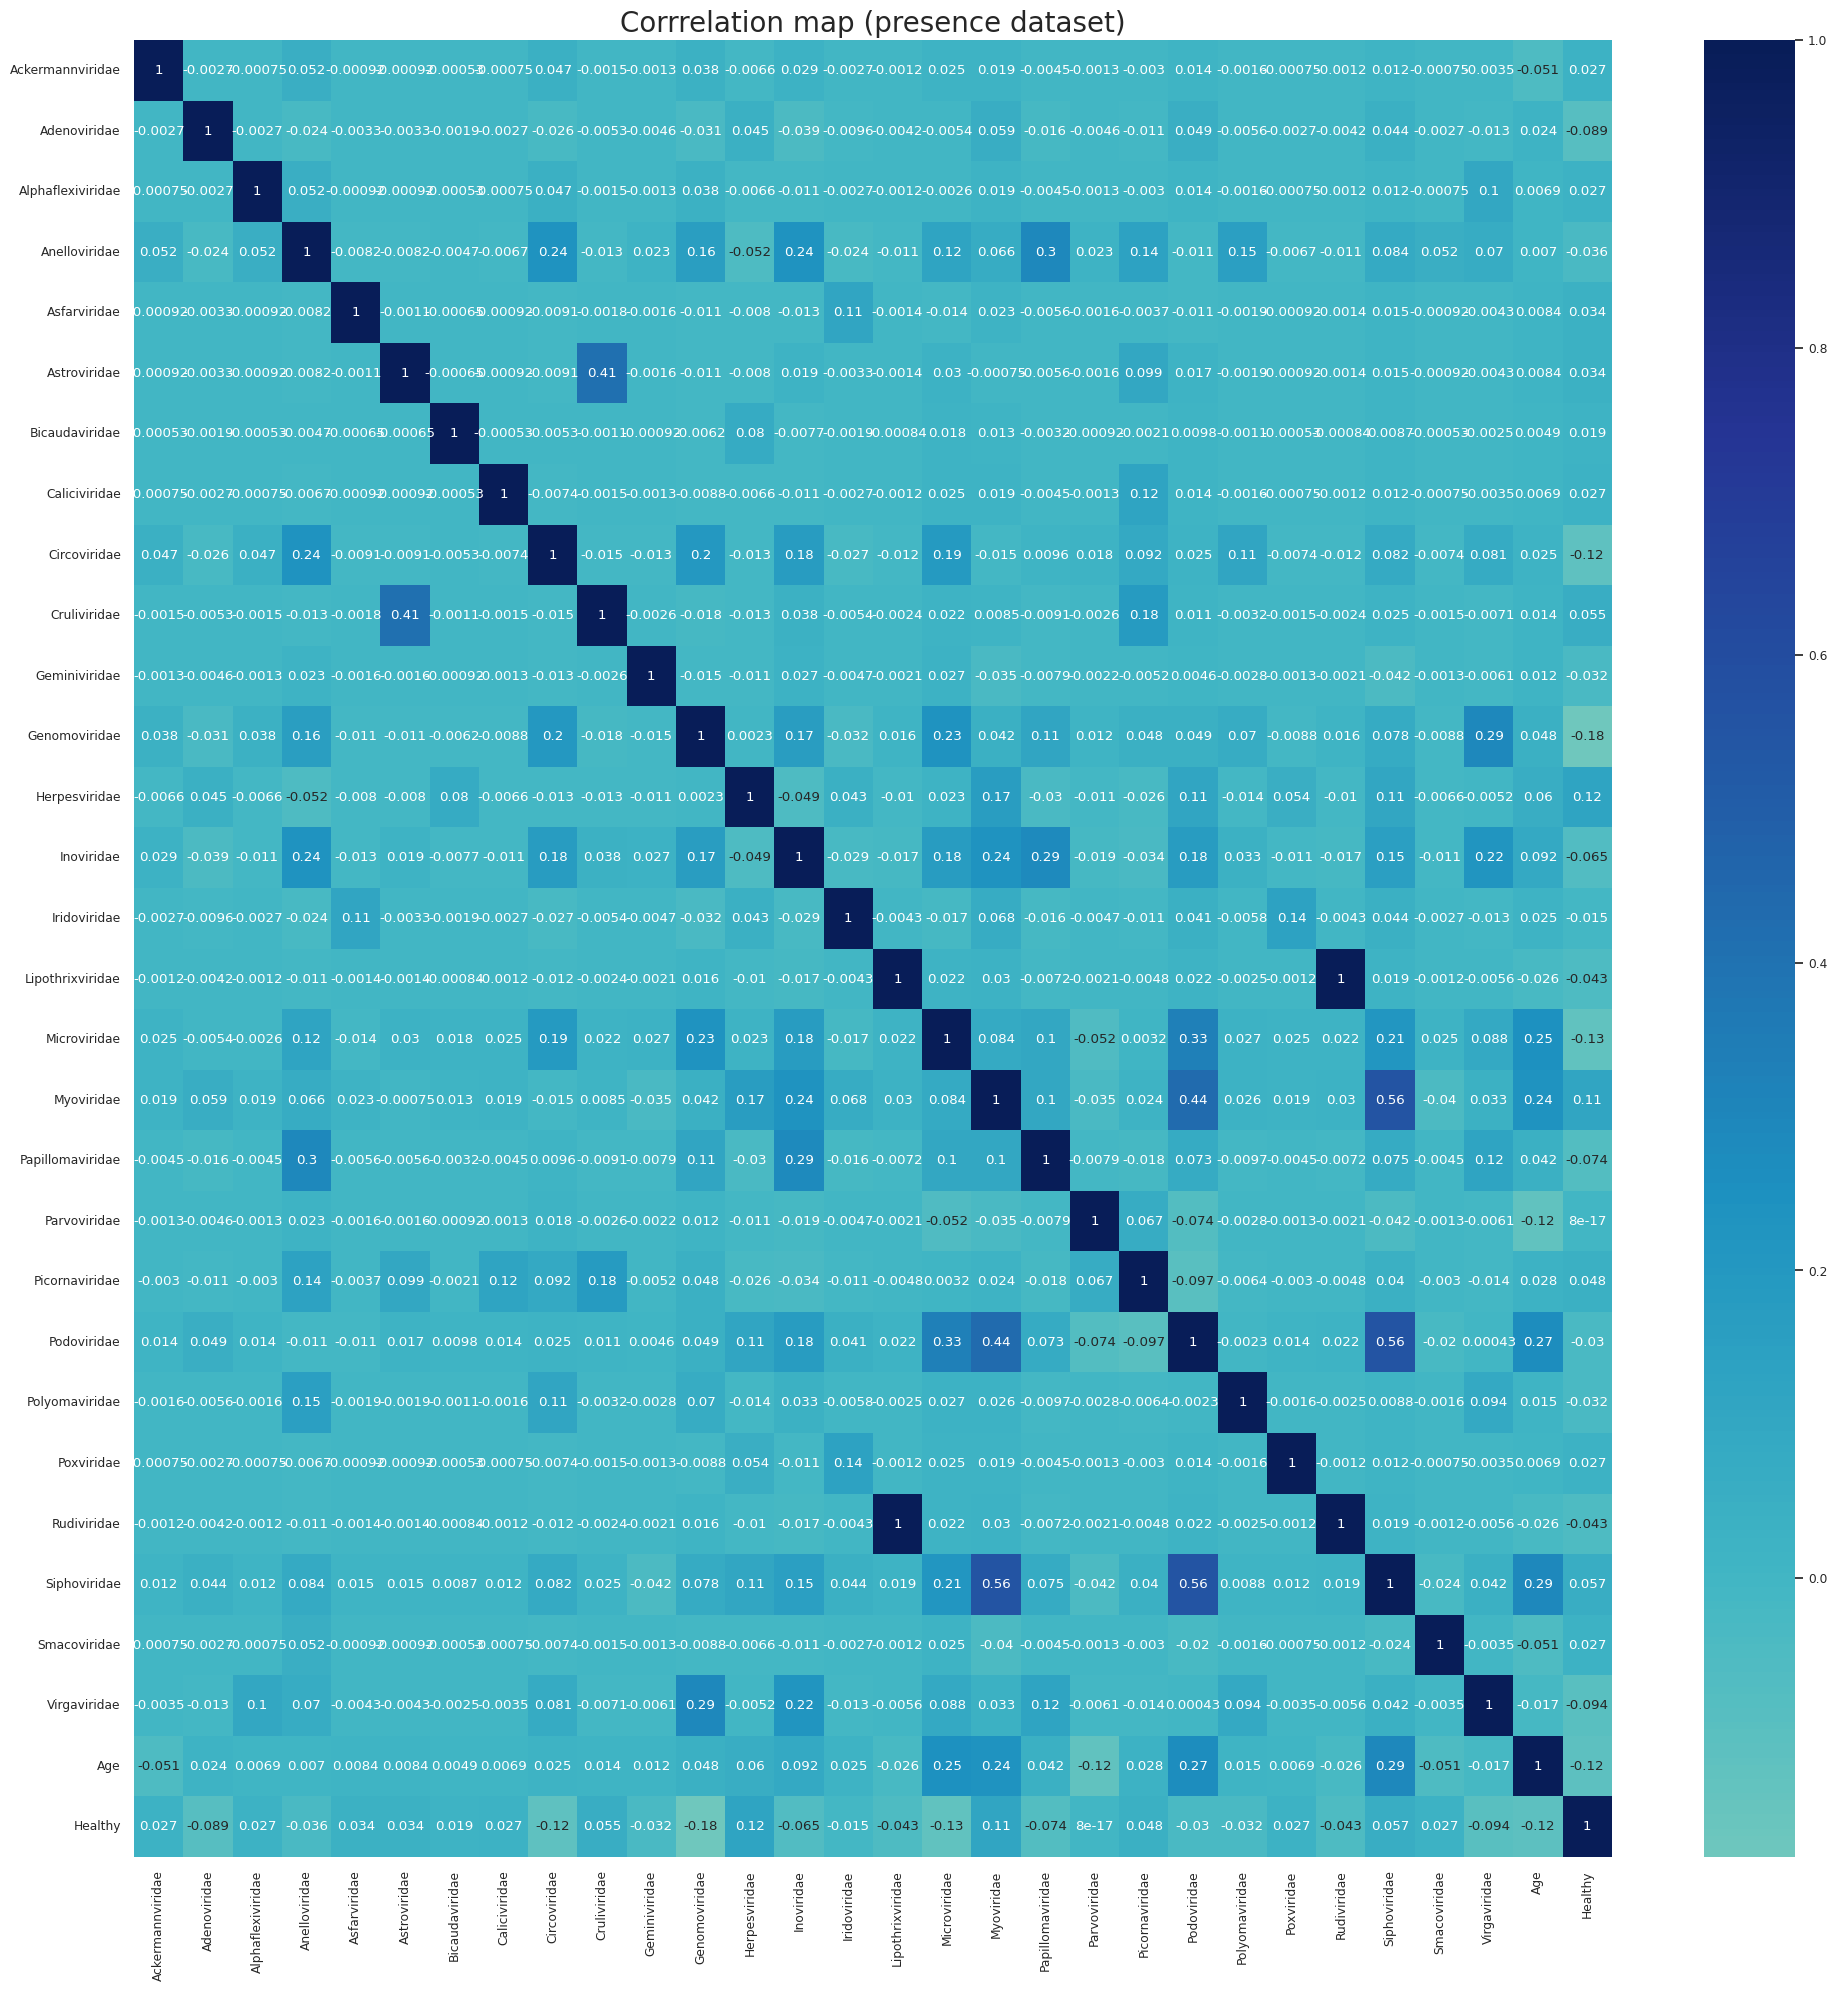

In [194]:
plt.figure(figsize=(20, 20))
correlations_presence = virus_presence_df.corr()
# plotting correlation heatmap
sns.set(font_scale=0.8)
sns.heatmap(correlations_presence, cmap="YlGnBu", center=0, annot=True)
plt.title('Corrrelation map (presence dataset)', fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

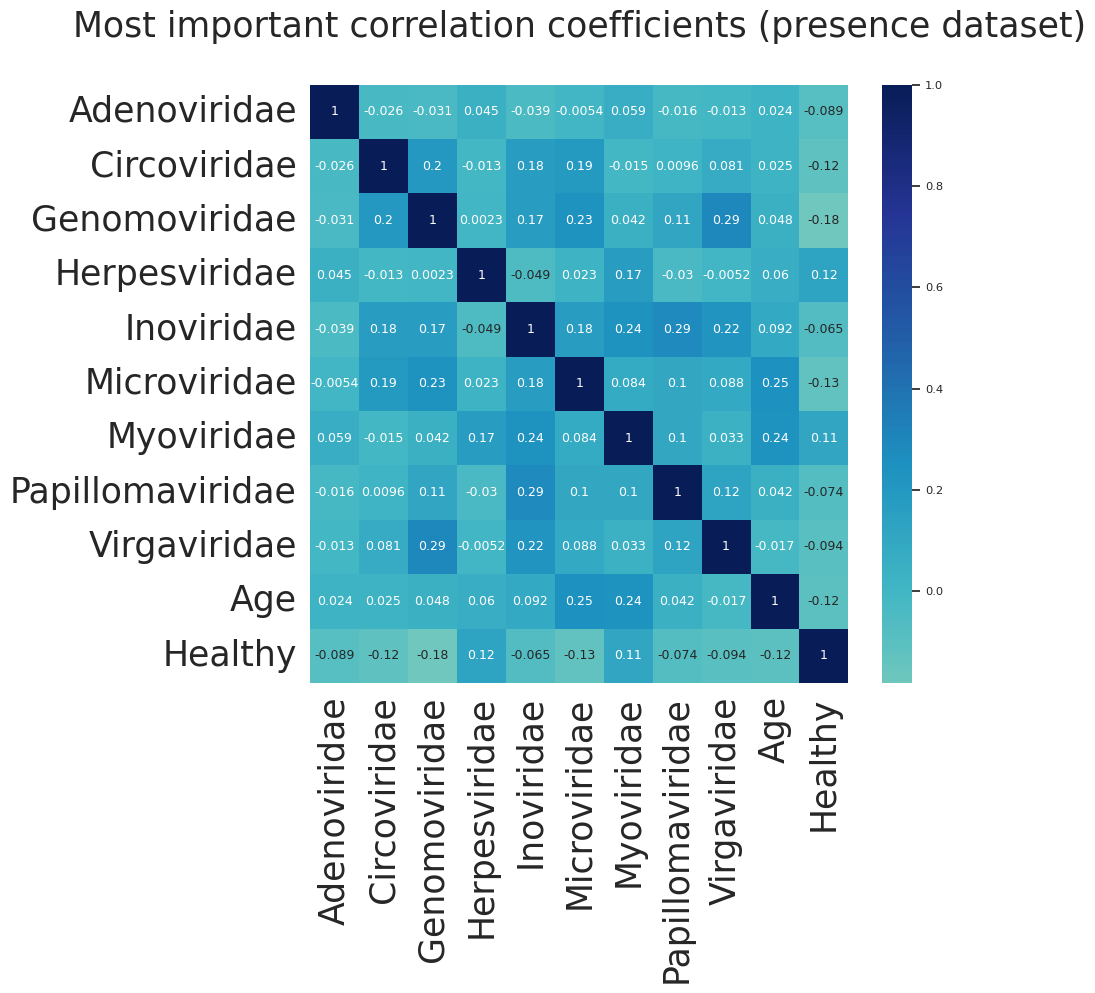

In [195]:
#best corr for healthy state
threshold = correlations_presence.mean().mean()
top_corr_prs = correlations_presence['Healthy']
top_corr_prs = top_corr_prs[abs(top_corr_prs) > threshold]
top_corr_prs_cat = top_corr_prs.index
virus_presence_df[top_corr_prs_cat].to_csv('top_virus_presence.csv')

plt.figure(figsize=(10, 10))
top_correlations_presence = virus_presence_df[top_corr_prs_cat].corr()
with open("top_corr_cat", "wb") as fp:
    pickle.dump(top_corr_prs_cat, fp)
# plotting correlation heatmap
sns.set(font_scale=0.75)
sns.heatmap(top_correlations_presence, cmap="YlGnBu", center=0, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title(f'Most important correlation coefficients (presence dataset)\n', fontsize=25)
plt.tick_params(labelsize=25)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ColabNotebooks/UMA/figures/p-a-corr.png', dpi=700)

In [196]:
mask = np.triu(np.ones_like(correlations_presence, dtype=bool), k=1)
triangle_matrix = correlations_presence.where(mask)

In [197]:
corr_pairs = triangle_matrix[mask].unstack().reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
corr_pairs_filtered = corr_pairs.loc[(corr_pairs['Correlation'] > 0.3)].drop_duplicates()
corr_pairs_sorted = corr_pairs_filtered.sort_values('Correlation', ascending=False)

In [198]:
corr_pairs_sorted

,Variable 1,Variable 2,Correlation
10770,Rudiviridae,Lipothrixviridae,1.000000
11232,Siphoviridae,Myoviridae,0.556151
11274,Siphoviridae,Podoviridae,0.555340
9492,Podoviridae,Myoviridae,0.437000
4050,Cruliviridae,Astroviridae,0.407255
9479,Podoviridae,Microviridae,0.328390


In [199]:
top_pairs = corr_pairs_sorted[corr_pairs_sorted['Variable 1'] != corr_pairs_sorted['Variable 2']]

In [200]:
top_pairs

,Variable 1,Variable 2,Correlation
10770,Rudiviridae,Lipothrixviridae,1.000000
11232,Siphoviridae,Myoviridae,0.556151
11274,Siphoviridae,Podoviridae,0.555340
9492,Podoviridae,Myoviridae,0.437000
4050,Cruliviridae,Astroviridae,0.407255
9479,Podoviridae,Microviridae,0.328390


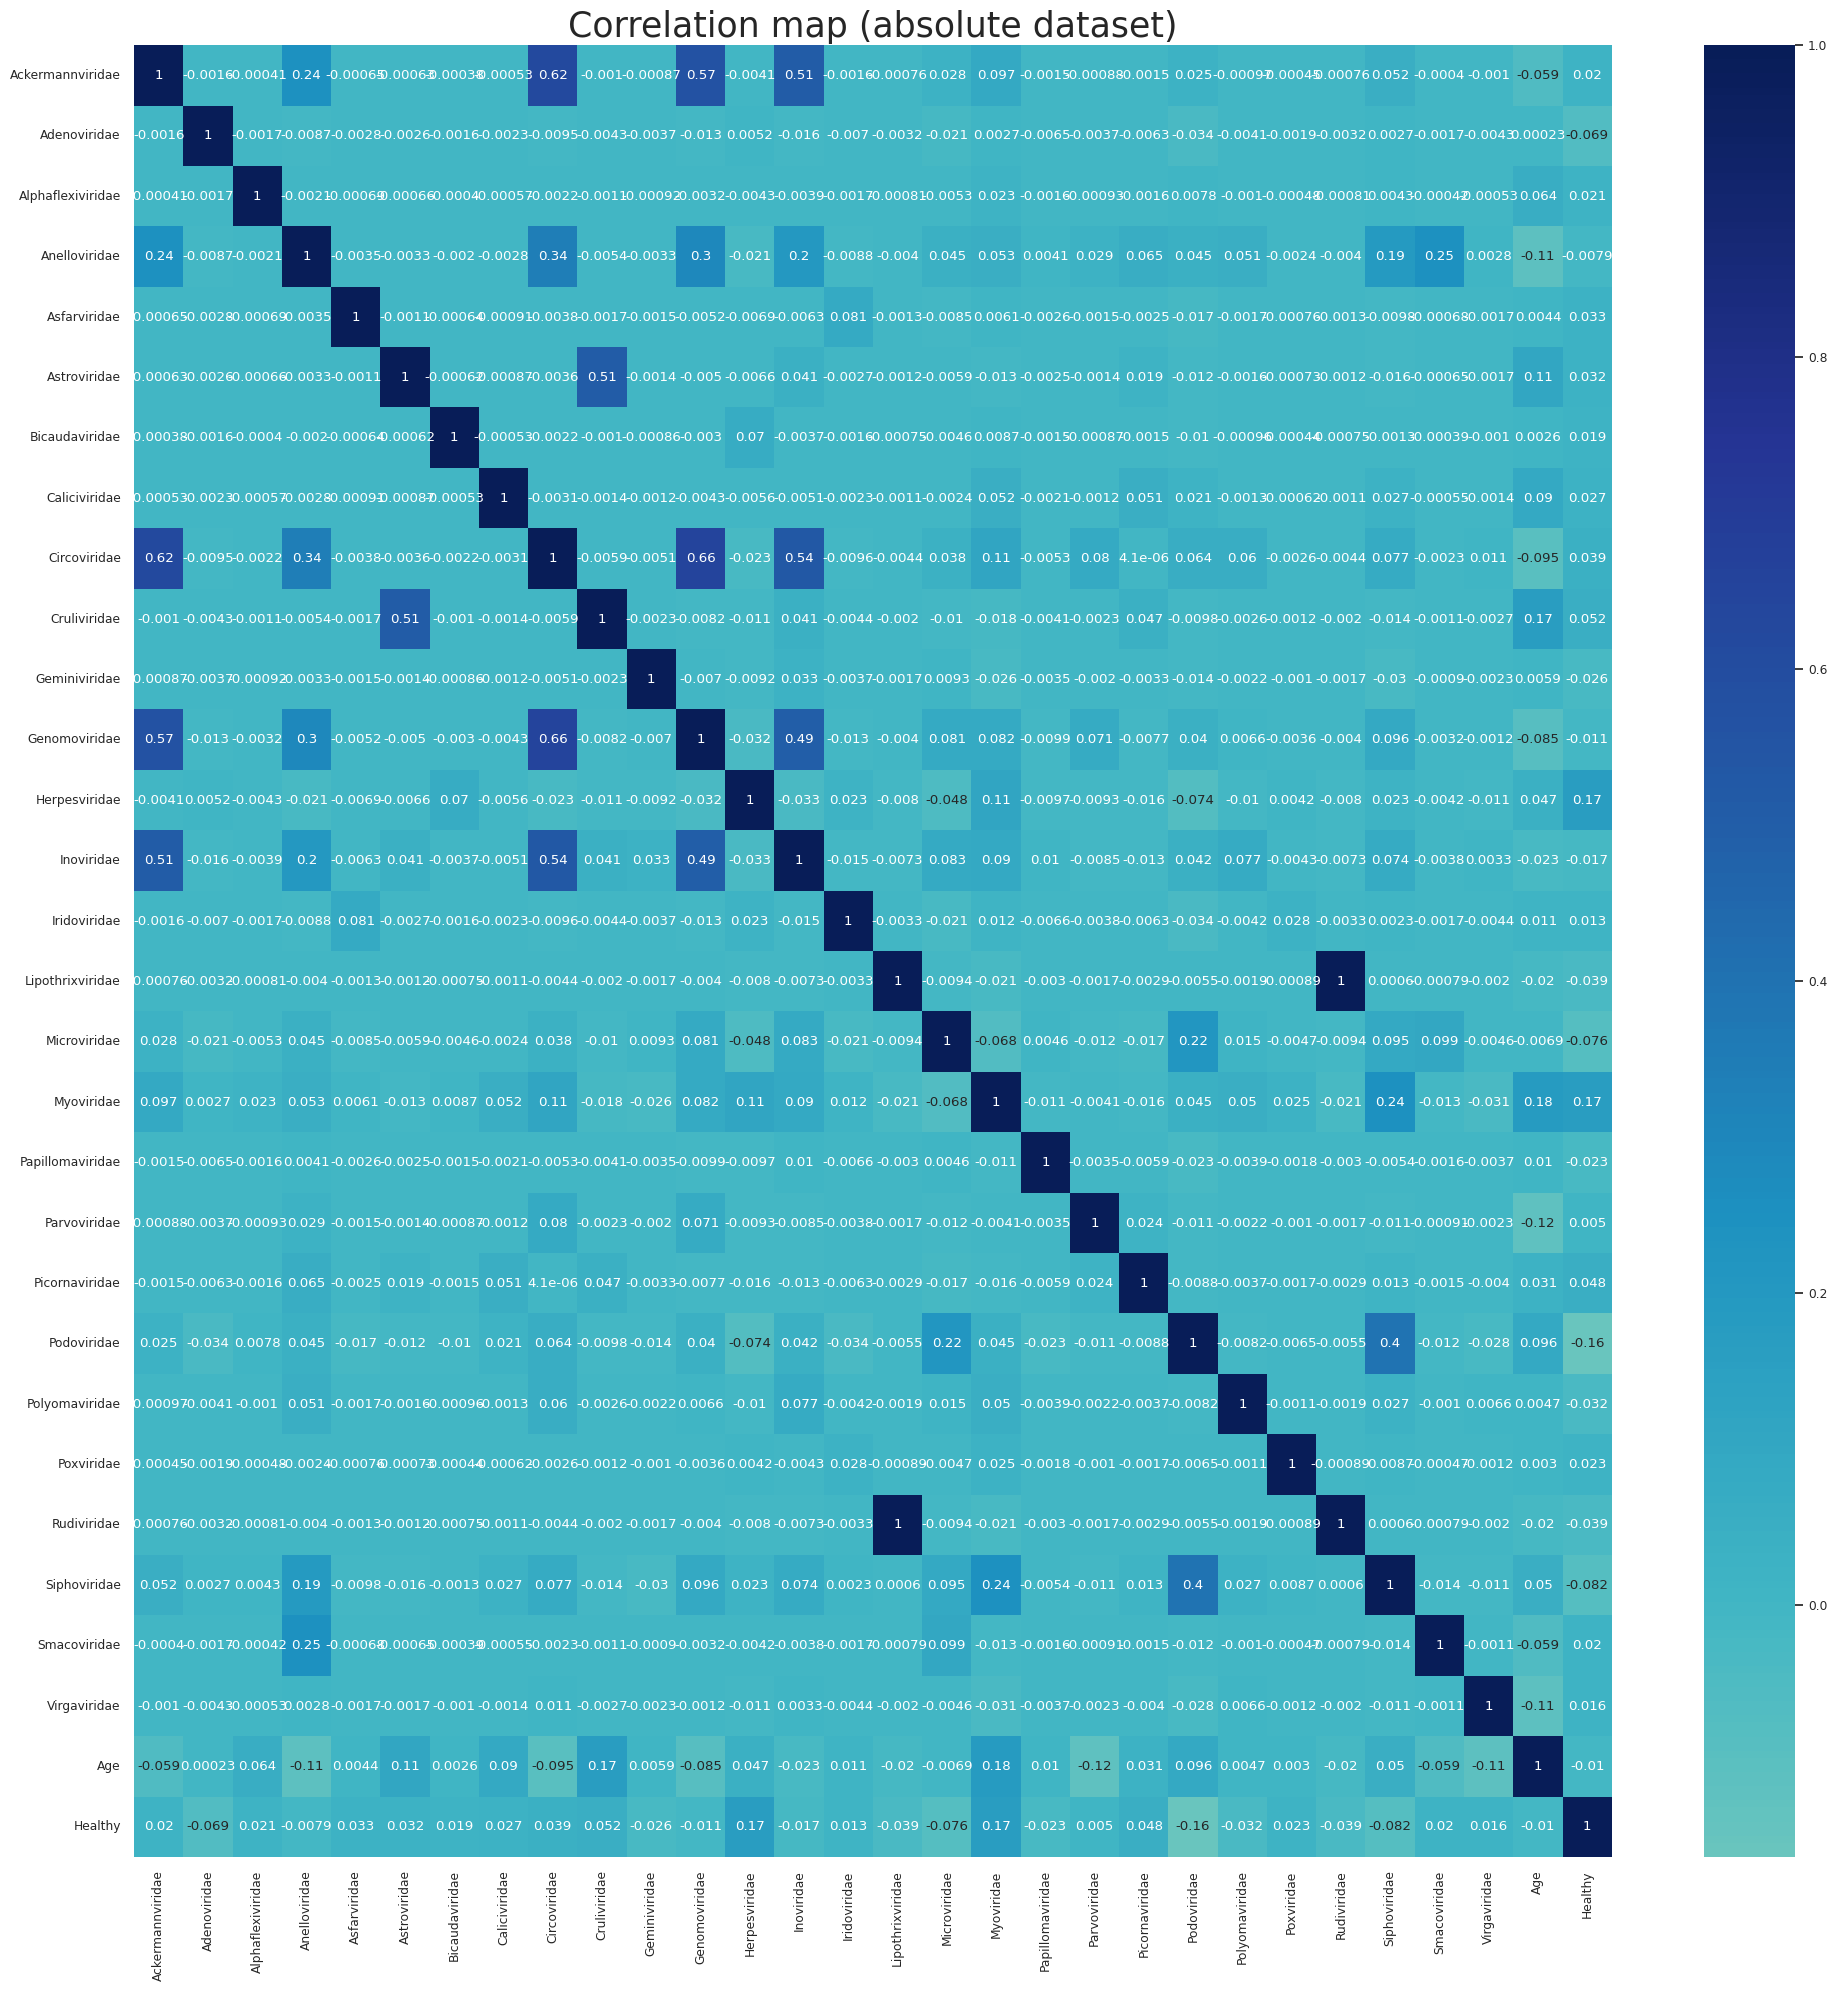

In [201]:
plt.figure(figsize=(20, 20))
correlations_abs = virus_df.corr()
# plotting correlation heatmap
sns.set(font_scale=0.8)
sns.heatmap(correlations_abs, cmap="YlGnBu", center=0, annot=True)
plt.title('Correlation map (absolute dataset)', fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

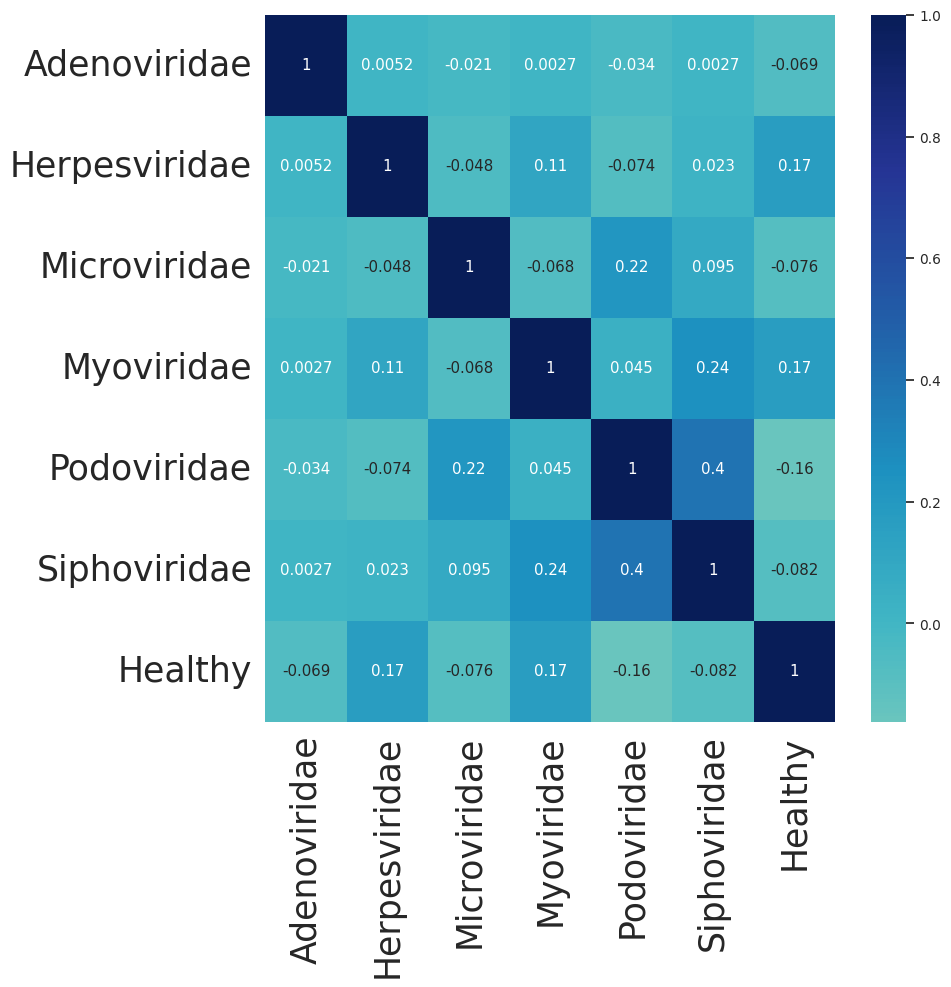

In [202]:
#top corr prsence for all map
threshold = correlations_abs.mean().mean()
top_corr_abs = correlations_abs['Healthy']
top_corr_abs = top_corr_abs[abs(top_corr_abs) > threshold]
top_corr_abs_cat = top_corr_abs.index

plt.figure(figsize=(10, 10))
top_correlations_presence = virus_df[top_corr_abs_cat].corr()
# plotting correlation heatmap
sns.set(font_scale=0.9)
sns.heatmap(top_correlations_presence, cmap="YlGnBu", center=0, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
# plt.title(f'Most important correlation coefficients (absolute dataset)\n', fontsize=25)
plt.tick_params(labelsize=25)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ColabNotebooks/UMA/figures/abs-corr.png', dpi=700)